<a href="https://colab.research.google.com/github/donghwi2022/ds-sa-cp2/blob/%EC%8B%A0%EB%8F%99%ED%9C%98/ds_sa_cp2_%EC%8B%A0%EB%8F%99%ED%9C%98.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. 필요 라이브러리 import

In [83]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error

# 2. 사용 데이터 확인

In [84]:
df = pd.read_csv("/content/movielens.csv", index_col = 0)
df.head()

,user_id,movie_id,rating,timestamp,age,gender,occupation,unknown,Action,Adventure,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,196,242,3,881250949,49,M,writer,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,305,242,5,886307828,23,M,programmer,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,242,4,883268170,42,M,executive,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,234,242,4,891033261,60,M,retired,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,63,242,3,875747190,31,M,marketing,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [85]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100000 entries, 0 to 99999
Data columns (total 26 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   user_id      100000 non-null  int64 
 1   movie_id     100000 non-null  int64 
 2   rating       100000 non-null  int64 
 3   timestamp    100000 non-null  int64 
 4   age          100000 non-null  int64 
 5   gender       100000 non-null  object
 6   occupation   100000 non-null  object
 7   unknown      100000 non-null  int64 
 8   Action       100000 non-null  int64 
 9   Adventure    100000 non-null  int64 
 10  Animation    100000 non-null  int64 
 11  Children's   100000 non-null  int64 
 12  Comedy       100000 non-null  int64 
 13  Crime        100000 non-null  int64 
 14  Documentary  100000 non-null  int64 
 15  Drama        100000 non-null  int64 
 16  Fantasy      100000 non-null  int64 
 17  Film-Noir    100000 non-null  int64 
 18  Horror       100000 non-null  int64 
 19  Mus

In [86]:
# 중복값 확인
df.duplicated().sum()

0

In [87]:
# 행당 순서의 열에 있는 값들을 확인하는 함수
def unique_value(col_index) :
    result = df.iloc[:, col_index].unique()
    result.sort()
    print(f"유니크 값의 개수 : {len(result)}")
    print(f"유니크 값들 : {result}")
    return

In [88]:
unique_value(1)

유니크 값의 개수 : 1682
유니크 값들 : [   1    2    3 ... 1680 1681 1682]


# 3. 데이터 EDA
1. 서브 데이터프레임 생성 
2. 시각화 진행

## 1. 서브 데이터프레임 생성

In [89]:
# 영화ID가 같은 데이터를 제거한 서브 데이터프레임 생성
sub_df = df.drop_duplicates(['movie_id'])
sub_df

,user_id,movie_id,rating,timestamp,age,gender,occupation,unknown,Action,Adventure,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,196,242,3,881250949,49,M,writer,0,0,0,...,0,0,0,0,0,0,0,0,0,0
117,196,393,4,881251863,49,M,writer,0,0,0,...,0,0,0,0,0,0,0,0,0,0
309,196,381,4,881251728,49,M,writer,0,0,0,...,0,0,0,0,0,1,0,0,0,0
409,196,251,3,881251274,49,M,writer,0,0,0,...,0,0,0,0,0,0,0,0,0,0
455,196,655,5,881251793,49,M,writer,0,0,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,863,1679,3,889289491,17,M,student,0,0,0,...,0,0,0,0,0,1,0,1,0,0
99996,863,1678,1,889289570,17,M,student,0,0,0,...,0,0,0,0,0,0,0,0,0,0
99997,863,1680,2,889289570,17,M,student,0,0,0,...,0,0,0,0,0,1,0,0,0,0
99998,896,1681,3,887160722,28,M,writer,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [90]:
# 장르별 정보를 나타내기 위한 딕셔너리 생성
genre = {
    "genre_name" : [],
    "number_of_movie" : [],
    "ratings_average" : []
}

for index in range(7, 26) :
    genre_name = sub_df.columns[index]
    genre["genre_name"].append(genre_name)
    genre["number_of_movie"].append(len(sub_df[sub_df[genre_name] == 1]))
    genre["ratings_average"].append(sub_df[sub_df[genre_name] == 1].rating.mean().round(2))

# 데이터프레임으로 변경
genre_df = pd.DataFrame({
    'genre_name' : genre["genre_name"],
    'number_of_movie' : genre["number_of_movie"],
    'ratings_average' : genre["ratings_average"]
})
genre_df

,genre_name,number_of_movie,ratings_average
0,unknown,2,2.00
1,Action,251,3.04
2,Adventure,135,3.30
3,Animation,42,3.29
4,Children's,122,2.95
5,Comedy,505,2.99
6,Crime,109,3.07
7,Documentary,50,3.00
8,Drama,725,3.11
9,Fantasy,22,3.23


## 2. 시각화 진행

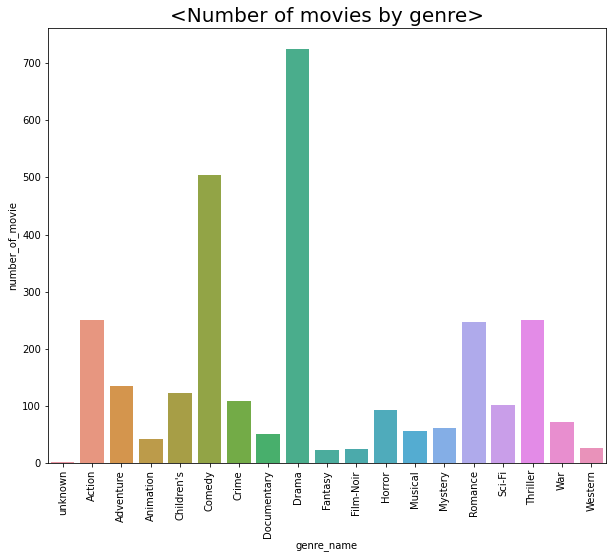

In [91]:
# 장르별 영화 개수 시각화
plt.figure(figsize=(10, 8))
plt.title('<Number of movies by genre>', fontsize=20)
sns.barplot(data= genre_df,x='genre_name', y='number_of_movie')
plt.xticks(rotation=90)
plt.show()

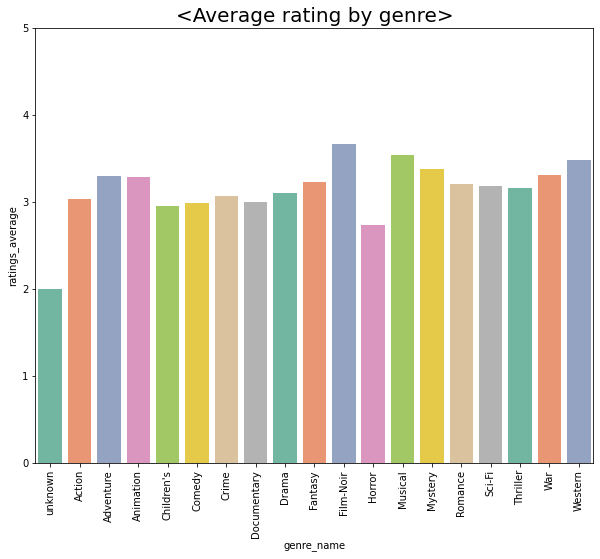

In [92]:
# 장르별 점수 평균 시각화
plt.figure(figsize=(10, 8))
plt.title('<Average rating by genre>', fontsize=20)
plt.ylim(0, 5)
sns.barplot(data= genre_df,x='genre_name', y='ratings_average', palette='Set2')
plt.xticks(rotation=90)
plt.show()

# 4. 머신러닝 진행
1. 학습 데이터와 테스트 데이터 분리
2. 기준모델 생성
3. CB모델 생성

## 1. 학습 데이터와 테스트 데이터 분리

In [105]:
# 특성과 타겟 구분
target = 'rating'
features = df.drop(columns=[target]).columns

# 학습데이터와 테스트 데이터 분리
train_set, test_set = train_test_split(df, test_size=0.2, shuffle=True, random_state=3)

X_test = test_set[features]
y_test = test_set[target]

In [106]:
# 학습 데이터와 검증 데이터 분리
train_set, valid_set = train_test_split(train_set, test_size=0.2, random_state=3)

X_val = valid_set[features]
y_val = valid_set[target]

X_train = train_set[features]
y_train = train_set[target]

## 2. 기준 모델 생성(최빈값)

In [110]:
# 최빈값으로 기준모델 생성
base = y_val.mode()[0] 
baseline = len(y_val) * [base]

16000

In [113]:
# 기준모델 평가
baseline_mae = mean_absolute_error(y_val, baseline)
baseline_mse = mean_squared_error(y_val, baseline)
baseline_rmse = np.sqrt(baseline_mse)

print('기준모델의 MAE :', baseline_mae)
print('기준모델의 RMSE :', baseline_rmse.round(2))

기준모델의 MAE : 0.9044375
기준모델의 RMSE : 1.23


## 3. CB 모델 생성